# ***ML Project***
***Chaitanya, John-Luke, Shashwat***

---


**Problem Statement:** You've been provided with thousands of sixty-second sequences of biological sensor data recorded from several hundred participants who could have been in either of two possible activity states. Can you determine what state a participant was in from the sensor data?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
train = pd.read_csv("/content/train.csv")
labels = pd.read_csv("/content/train_labels.csv")
test = pd.read_csv("/content/test.csv")
submissions = pd.read_csv("/content/sample_submission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558080 entries, 0 to 1558079
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sequence   1558080 non-null  int64  
 1   subject    1558080 non-null  int64  
 2   step       1558080 non-null  int64  
 3   sensor_00  1558080 non-null  float64
 4   sensor_01  1558080 non-null  float64
 5   sensor_02  1558080 non-null  float64
 6   sensor_03  1558080 non-null  float64
 7   sensor_04  1558080 non-null  float64
 8   sensor_05  1558080 non-null  float64
 9   sensor_06  1558080 non-null  float64
 10  sensor_07  1558080 non-null  float64
 11  sensor_08  1558080 non-null  float64
 12  sensor_09  1558080 non-null  float64
 13  sensor_10  1558080 non-null  float64
 14  sensor_11  1558080 non-null  float64
 15  sensor_12  1558080 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 190.2 MB


In [ ]:
dft = pd.DataFrame(range(0,1558080 ), columns=list('t'))
dft

,t
0,0
1,1
2,2
3,3
4,4
...,...
1558075,1558075
1558076,1558076
1558077,1558077
1558078,1558078


In [ ]:
train['sensor_01'][:100]

0     0.112395
1     0.134454
2    -0.694328
3     0.751050
4     1.074580
        ...   
95   -0.183824
96   -0.225840
97    0.635504
98   -0.420168
99    0.308824
Name: sensor_01, Length: 100, dtype: float64

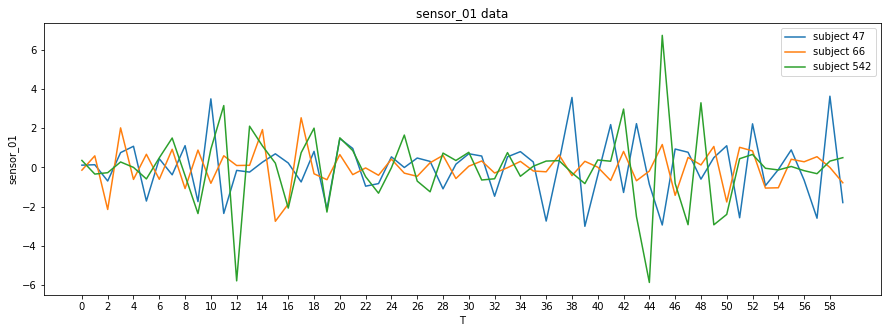

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(dft['t'][:60], train['sensor_01'][:60], label = "subject 47")
plt.plot(dft['t'][:60], train['sensor_01'][60:120], label = "subject 66")
plt.plot(dft['t'][:60], train['sensor_01'][180:240], label = "subject 542")
plt.xticks(np.arange(0, 60, step=2)) 
plt.xlabel("T")
plt.ylabel("sensor_01")
plt.title("sensor_01 data")
plt.legend()
plt.show()

In [ ]:
train['state']= train['sequence'].map(labels.set_index('sequence')['state'])
train.shape

(1558080, 17)

In [ ]:
test.shape

(733080, 16)

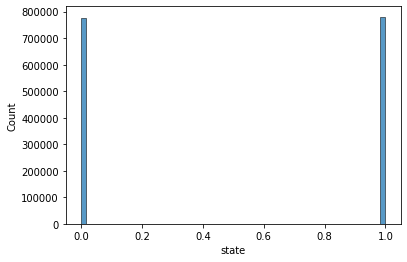

In [ ]:
sns.histplot(train['state'])

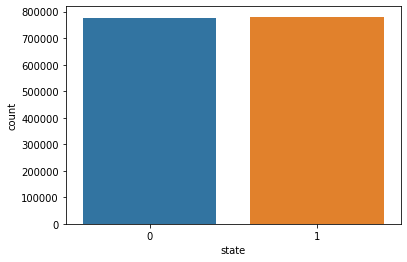

In [ ]:
sns.countplot(train['state'])

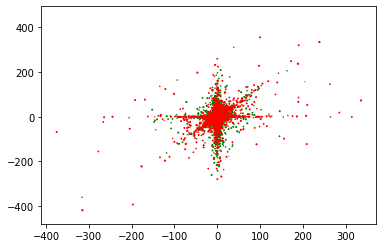

In [ ]:

ax = plt.subplot()
ax.scatter(train[train['state'] == 1]['sensor_00'], train[train['state'] == 1]['sensor_01'], c='green', s=train[train['state'] == 1]['sensor_02'])
ax.scatter(train[train['state'] == 0]['sensor_00'], train[train['state'] == 0]['sensor_01'], c='red', s=train[train['state'] == 0]['sensor_02']);

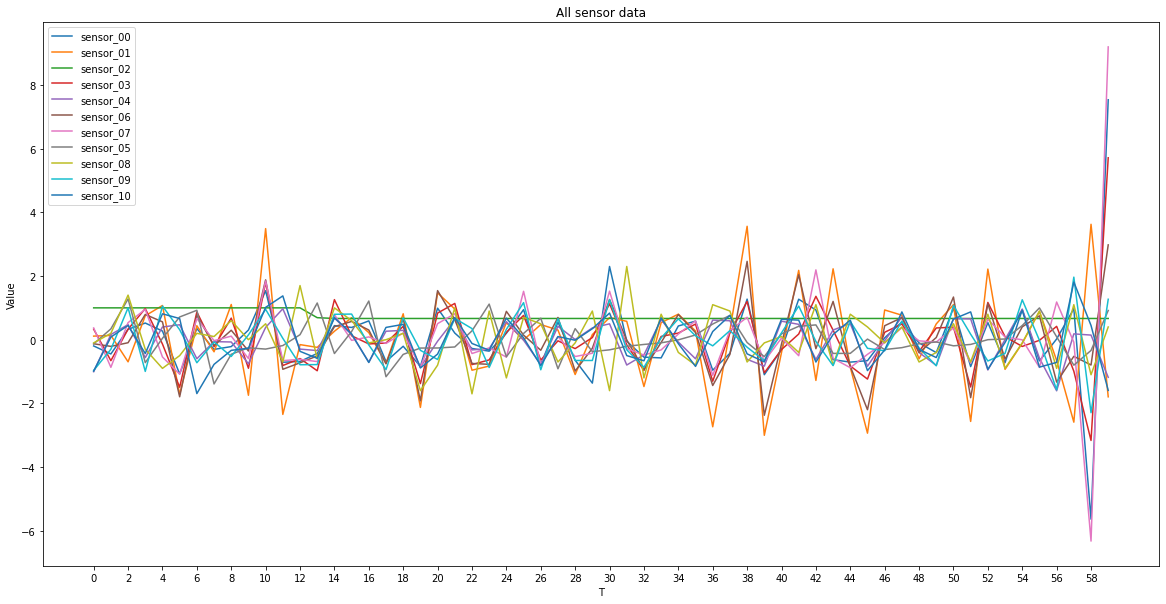

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(dft['t'][:60], train['sensor_00'][:60], label = "sensor_00")
plt.plot(dft['t'][:60], train['sensor_01'][:60], label = "sensor_01")
plt.plot(dft['t'][:60], train['sensor_02'][:60], label = "sensor_02")
plt.plot(dft['t'][:60], train['sensor_03'][:60], label = "sensor_03")
plt.plot(dft['t'][:60], train['sensor_04'][:60], label = "sensor_04")
plt.plot(dft['t'][:60], train['sensor_06'][:60], label = "sensor_06")
plt.plot(dft['t'][:60], train['sensor_07'][:60], label = "sensor_07")
plt.plot(dft['t'][:60], train['sensor_05'][:60], label = "sensor_05")
plt.plot(dft['t'][:60], train['sensor_08'][:60], label = "sensor_08")
plt.plot(dft['t'][:60], train['sensor_09'][:60], label = "sensor_09")
plt.plot(dft['t'][:60], train['sensor_10'][:60], label = "sensor_10")
# plt.plot(dft['t'][:60], train['sensor_12'][60:120], label = "sensor_12")

plt.xticks(np.arange(0, 60, step=2)) 
plt.xlabel("T")
plt.ylabel("Value")
plt.title("All sensor data")
plt.legend()
plt.show()

In [ ]:
target = train['state']
train = train.drop(columns= 'state', axis= 1)
train

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424


In [ ]:
combi = train.append(test)
combi

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.00000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.00000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.00000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.00000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.00000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733075,38185,773,55,0.211747,2.005252,-1.33282,0.695575,-0.161327,-1.193717,0.421676,0.869466,0.0,-1.536850,0.388101,2.205761,-91.610827
733076,38185,773,56,-0.826121,-2.468487,-1.33282,0.381416,0.144745,1.060583,-0.765938,0.288550,0.2,-1.956647,-0.032158,-1.794239,72.414749
733077,38185,773,57,0.755023,1.469538,-1.33282,-1.253097,-0.414802,0.007479,0.907104,-1.556489,0.4,4.341763,0.150273,0.641975,-34.065644
733078,38185,773,58,-0.187017,0.714286,-1.33282,0.077876,1.323245,0.159312,-0.397996,0.306870,0.1,-1.013728,-0.608616,0.317901,65.659420


In [ ]:
combi = combi.drop(columns= ['sequence','subject','step'], axis= 1)
combi

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,-0.196291,0.112395,1.00000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,-0.447450,0.134454,1.00000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0.326893,-0.694328,1.00000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0.523184,0.751050,1.00000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0.272025,1.074580,1.00000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733075,0.211747,2.005252,-1.33282,0.695575,-0.161327,-1.193717,0.421676,0.869466,0.0,-1.536850,0.388101,2.205761,-91.610827
733076,-0.826121,-2.468487,-1.33282,0.381416,0.144745,1.060583,-0.765938,0.288550,0.2,-1.956647,-0.032158,-1.794239,72.414749
733077,0.755023,1.469538,-1.33282,-1.253097,-0.414802,0.007479,0.907104,-1.556489,0.4,4.341763,0.150273,0.641975,-34.065644
733078,-0.187017,0.714286,-1.33282,0.077876,1.323245,0.159312,-0.397996,0.306870,0.1,-1.013728,-0.608616,0.317901,65.659420


In [ ]:
y = target
x = combi[:len(train)]
x_test = combi[len(train):]

In [ ]:
# sns.set_style("whitegrid");
# sns.pairplot(x_train["sensor_01"]);
# plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

sc = StandardScaler()
sc.fit(x)
Scaled_X = sc.transform(x)
Scaled_X = pd.DataFrame(Scaled_X)

In [ ]:
print(Scaled_X.mean().values, Scaled_X.std().values)
Scaled_X.head()

[ 1.72485454e-18  2.90488691e-18 -2.04637294e-15 -3.36525310e-18
  1.17664772e-18  6.26009739e-18 -8.32204105e-18 -1.26568217e-17
 -3.54601759e-16  6.19622989e-18 -8.92292376e-18  4.82295167e-19
  4.40053813e-19] [1.00000032 1.00000032 1.00000032 1.00000032 1.00000032 1.00000032
 1.00000032 1.00000032 1.00000032 1.00000032 1.00000032 1.00000032
 1.00000032]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.073994,0.025755,0.529941,0.084226,-0.595617,-0.081710,-0.037993,0.113685,-0.022186,-0.372260,-0.513943,0.118173,0.121766
1,-0.168462,0.030764,0.529941,-0.166807,0.097598,0.214962,-0.062496,-0.267356,0.044458,-0.116728,0.042977,-0.050247,0.011916
2,0.122789,-0.157416,0.529941,0.084451,0.282421,0.805957,-0.028192,0.165228,0.311034,0.385976,0.234122,-0.128556,-0.120775
3,0.196619,0.170766,0.529941,0.248882,-0.333470,-0.451728,0.237261,0.293261,-0.066615,-0.384521,-0.226680,0.297488,0.011273
4,0.102151,0.244225,0.529941,-0.034093,0.237816,0.029248,0.167563,-0.167094,-0.199903,0.406597,0.423661,0.028061,-0.005410


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val =  train_test_split(Scaled_X,y, test_size = 0.05, random_state=1, stratify=y, shuffle=True)
x_train.shape, x_val.shape, y_train.shape, y_val.shape, x_test.shape

((1480176, 13), (77904, 13), (1480176,), (77904,), (733080, 13))

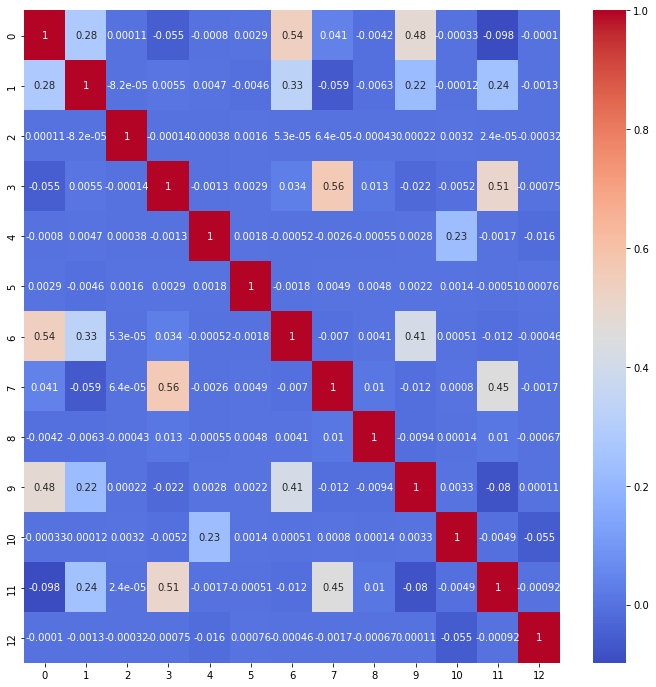

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# ML Approch
## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression( random_state=10, solver='sag')
model.fit(x_train, y_train)
print(model.score(x_train, y_train))

0.5382920679702954


In [ ]:
y_pred = model.predict(x_val)
print(model.score(x_val, y_val))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val,y_pred))

[[17217 21645]
 [14312 24730]]


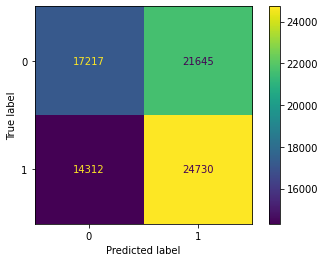

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
prediction = model.predict(x_test)
prediction

array([1, 1, 1, ..., 0, 0, 0])

## LSTM

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Multiply
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import plot_model

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GroupKFold

In [132]:
train = pd.read_csv("F:/OneDrive - Texas State University/@SPRING 2022/ML/Git/project/train.csv")
labels = pd.read_csv("F:/OneDrive - Texas State University/@SPRING 2022/ML/Git/project/train_labels.csv")
test = pd.read_csv("F:/OneDrive - Texas State University/@SPRING 2022/ML/Git/project/test.csv")
submissions = pd.read_csv("F:/OneDrive - Texas State University/@SPRING 2022/ML/Git/project/sample_submission.csv")

In [133]:
labels['state'].value_counts()

1    13014
0    12954
Name: state, dtype: int64

In [134]:
data=train.loc[1].reset_index()
features = train.columns.tolist()[3:]

In [135]:
groups = train['sequence']
labels = labels['state']

train = train.drop(['sequence', 'subject', 'step'], axis=1).values
train = train.reshape(-1, 60, train.shape[-1])

test =test.drop(['sequence', 'subject', 'step'], axis=1).values
test = test.reshape(-1, 60, test.shape[-1])

In [136]:
x_input = Input(shape=(train.shape[-2:])) # (60,39)
x1 = Bidirectional(LSTM(units=128, return_sequences=True))(x_input)
x2 = GlobalMaxPooling1D()(x1)
x_output = Dense(1, activation='sigmoid')(x2)
model = Model(inputs=x_input, outputs=x_output, name='lstm_model')

In [137]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=[AUC(name = 'auc')])
model.summary()

Model: "lstm_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 60, 13)]          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 60, 256)           145408    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 145,665
Trainable params: 145,665
Non-trainable params: 0
_________________________________________________________________


In [138]:
scores = []
test_preds = []
kf = GroupKFold(n_splits=5)

In [139]:
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(train, labels, groups.unique())):
    
    print('\n')
    print('*'*15, f'↓ Fold {fold_idx+1} ↓', '*'*15)
    
    # Separate into train data and validation data
    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = labels.iloc[train_idx].values, labels.iloc[valid_idx].values
    
    tensorboard_callback = tf.keras.callbacks.TensorBoard(histogram_freq=1)
    # Train the model
    model.fit(X_train, y_train, 
              validation_data=(X_valid, y_valid), 
              epochs=5, 
              batch_size=256, 
              callbacks=[tensorboard_callback] )
    
    # Save score
    score = roc_auc_score(y_valid, model.predict(X_valid, batch_size=512).squeeze())
    scores.append(score)
    
    # Predict
    test_preds.append(model.predict(test, batch_size=512).squeeze())
    
    print(f'Fold {fold_idx+1} | Score: {score}')
    print('*'*15, f'↑ Fold {fold_idx+1} ↑', '*'*15)
    
print(f'Mean accuracy on {kf.n_splits} folds {np.mean(scores)}')



*************** ↓ Fold 1 ↓ ***************
Epoch 1/5
82/82 [==============================] - 33s 342ms/step - loss: 0.6577 - auc: 0.6578 - val_loss: 0.6332 - val_auc: 0.7262
Epoch 2/5
82/82 [==============================] - 19s 229ms/step - loss: 0.5765 - auc: 0.7748 - val_loss: 0.5547 - val_auc: 0.7976
Epoch 3/5
82/82 [==============================] - 19s 230ms/step - loss: 0.5144 - auc: 0.8274 - val_loss: 0.5089 - val_auc: 0.8309
Epoch 4/5
82/82 [==============================] - 19s 230ms/step - loss: 0.4626 - auc: 0.8639 - val_loss: 0.4786 - val_auc: 0.8518
Epoch 5/5
82/82 [==============================] - 19s 236ms/step - loss: 0.4246 - auc: 0.8870 - val_loss: 0.4420 - val_auc: 0.8751
Fold 1 | Score: 0.8751525673361658
*************** ↑ Fold 1 ↑ ***************


*************** ↓ Fold 2 ↓ ***************
Epoch 1/5
82/82 [==============================] - 26s 312ms/step - loss: 0.4013 - auc: 0.9001 - val_loss: 0.3833 - val_auc: 0.9158
Epoch 2/5
82/82 [=======================